# Описание проекта (вводная часть)
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Этап 1. Приоритизация гипотез.


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задачи на 1 Этап
    Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


## Этап 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.


### Задачи на 2 Этап


Проанализировать A/B-тест:

    - Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
    - Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
    - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
    - Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
    - Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
    - Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
    - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    - Построить точечный график стоимостей заказов. Сделать выводы и предположения.
    - Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов. 
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    
    
По итогам анализа принять решение по результатам теста и объяснить его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Общий план**

Перед выполнением любой из задач, в первую очередь необходимо подготовить набор библиотек, познакомится с данными.

Сам процесс исследования будет проведен в следующем порядке (основные этапы):

    - загрузка библиотек и знакомство с данными
    - предобработка данных
    - формирование временных таблиц, включая новые сводные (если потребуется)
    - проведение 1 Этапа - приоретизация гипотез ( с использованием фреймворков ICE и RICE)
    - проведение 2 Этапа (Анализ А/В тестов)
    - Общие выводы по результатам

*Итоговая цель анализа* - оценка результатов текущего этапа тестирования, отработка гипотез, сформированных с отделом маркетинга, определение целесообразности проведения дальнейшего тестирования.

# Подготовка, знакомство и предобработка 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
from matplotlib.dates import DateFormatter
from matplotlib import colors
import seaborn as sns
!pip install tabulate
from tabulate import tabulate
from scipy import stats as st

In [2]:
try:
    hypothesis = pd.read_csv (r'C:\Users\PC_Maks\Desktop\study\S 13 (11) business solutions\Project\hypothesis.csv')
    orders = pd.read_csv (r'C:\Users\PC_Maks\Desktop\study\S 13 (11) business solutions\Project\orders.csv',\
                         parse_dates=["date"])
    visitors = pd.read_csv (r'C:\Users\PC_Maks\Desktop\study\S 13 (11) business solutions\Project\visitors.csv',\
                           parse_dates=["date"])
except:
    hypothesis = pd.read_csv ('/datasets/hypothesis.csv')
    orders = pd.read_csv ('/datasets/orders.csv', parse_dates=["date"])
    visitors = pd.read_csv ('/datasets/visitors.csv', parse_dates=["date"])
    
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 1000)

## Знакомство с данными

In [3]:
display (hypothesis.shape)
display (hypothesis.head ())
display (hypothesis.info ())


(9, 5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [4]:
num_columns = len(hypothesis.columns)
for i in range(1, num_columns):
    col_name = hypothesis.columns[i]
    print(f"Максимальное значение в столбце '{col_name}': {hypothesis[col_name].max()}")
    print(f"Минимальное значение в столбце '{col_name}': {hypothesis[col_name].min()}")
    print ()


Максимальное значение в столбце 'Reach': 10
Минимальное значение в столбце 'Reach': 1

Максимальное значение в столбце 'Impact': 10
Минимальное значение в столбце 'Impact': 1

Максимальное значение в столбце 'Confidence': 9
Минимальное значение в столбце 'Confidence': 1

Максимальное значение в столбце 'Efforts': 10
Минимальное значение в столбце 'Efforts': 1



In [5]:
display (orders.shape)
display (orders.head ())
display (orders.info ())

(1197, 5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

In [6]:
display (orders['date'].max ())
display (orders['date'].min ())

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

In [7]:
display (visitors.shape)
display (visitors.head ())
display (visitors.info ())

(62, 3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [8]:
display (visitors['date'].max ())
display (visitors['date'].min ())

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

In [9]:
display (orders ['group'].unique ())
display (visitors ['group'].unique ())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

По результатам первичного знакомства с данными, предварительно, данные без пропусков, безотлагательных корректировок не требуют. формат даты мы заменили на этапе загрузки таблиц, дополнительная корректировка пока не требуется.

Даты корректны, период с 1 по 31 августа 2019 года.
В группах только 2 значения.


## Отработка пропусков, дубликатов

стоит проверить на явные дубликаты и итог на пропуски

In [10]:
print (f' Явные дублика во всех строках и столбцах {orders.duplicated ().sum ()}')
print ()
duplicates = orders.duplicated()
duplicate_rows = orders.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дублика во всех строках и столбцах 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  0 non-null      int64         
 1   visitorId      0 non-null      int64         
 2   date           0 non-null      datetime64[ns]
 3   revenue        0 non-null      int64         
 4   group          0 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []


In [11]:
print (f' Явные дублика во всех строках и столбцах {visitors.duplicated ().sum ()}')
print ()
duplicates = visitors.duplicated()
duplicate_rows = visitors.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дублика во всех строках и столбцах 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      0 non-null      datetime64[ns]
 1   group     0 non-null      object        
 2   visitors  0 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [date, group, visitors]
Index: []


In [12]:
display (hypothesis.isna ().sum ())
display (orders.isna ().sum ())
display (visitors.isna ().sum ())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [15]:
orders_a = orders.query ('group=="A"')
orders_b = orders.query ('group=="B"')
duples = orders_a.merge (orders_b, on='visitorId')
duples ['visitorId'].value_counts ().count ()

58

In [16]:
orders [orders['visitorId']==2378935119]

,transactionId,visitorId,date,revenue,group
33,486237576,2378935119,2019-08-15,1650,A
118,4233533907,2378935119,2019-08-22,3390,A
179,1784270968,2378935119,2019-08-17,310,A
391,2213813903,2378935119,2019-08-25,21220,B
435,2430683444,2378935119,2019-08-28,20450,B
473,3224706027,2378935119,2019-08-28,4410,B
697,1612868255,2378935119,2019-08-09,30649,B
1029,469609643,2378935119,2019-08-10,58220,A
1031,1661772358,2378935119,2019-08-10,2640,B


## Предварительно посмотрим на выбросы

В группе В есть аномально высокие значения в категории revenue, но детальный анализ и решение о дальнейших действиях будем принимать в ходе проведения основного анализа. Прим. Данная оценка для внутреннего использования, не для презентации

In [17]:
orders_group = orders.groupby('group', as_index=False)['revenue'].agg({'revenue': 'sum'})

orders_group

group_counts = orders_group.groupby('group').sum()


total_count = group_counts['revenue'].sum()


group_counts['percentage'] = group_counts['revenue'] / total_count * 100


difference = group_counts.loc['B', 'percentage'] - group_counts.loc['A', 'percentage']

print(group_counts)
print(f'Группа B на {difference:.2f}% больше группы A')

       revenue  percentage
group                     
A      4084803   40.878431
B      5907760   59.121569
Группа B на 18.24% больше группы A


count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


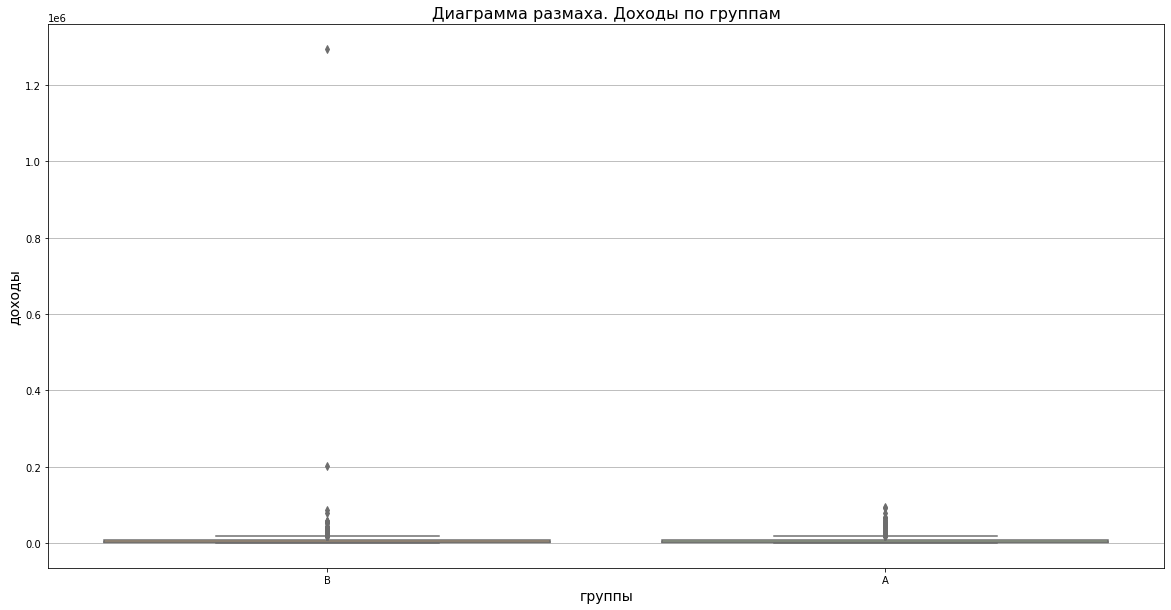

In [18]:
display(orders['revenue'].describe())
plt.figure(figsize=(20,10))

plt.grid(axis='y', alpha=1)

sns.boxplot(x='group', y='revenue', data=orders, palette='Spectral')
plt.title('Диаграмма размаха. Доходы по группам', fontsize=16)
plt.xlabel('группы', fontsize=14)
plt.ylabel('доходы', fontsize=14)
plt.show()

Проведем аналогичную процедуру в части оценки на выбросы в файле visitors, в части количество посетителей.
Предварительно, аномальных выбросов нет, группы в общем и целом близки по размерам, но стоит помнить, что они совсем равные

In [19]:
visitors_group = visitors.groupby('group', as_index=False)['visitors'].agg({'visitors': 'sum'})

visitors_group

group_counts = visitors_group.groupby('group').sum()


total_count = group_counts['visitors'].sum()


group_counts['percentage'] = group_counts['visitors'] / total_count * 100


difference = group_counts.loc['B', 'percentage'] - group_counts.loc['A', 'percentage']

print(group_counts)
print(f'Группа B на {difference:.2f}% больше группы A')

       visitors  percentage
group                      
A         18736   49.760969
B         18916   50.239031
Группа B на 0.48% больше группы A


count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

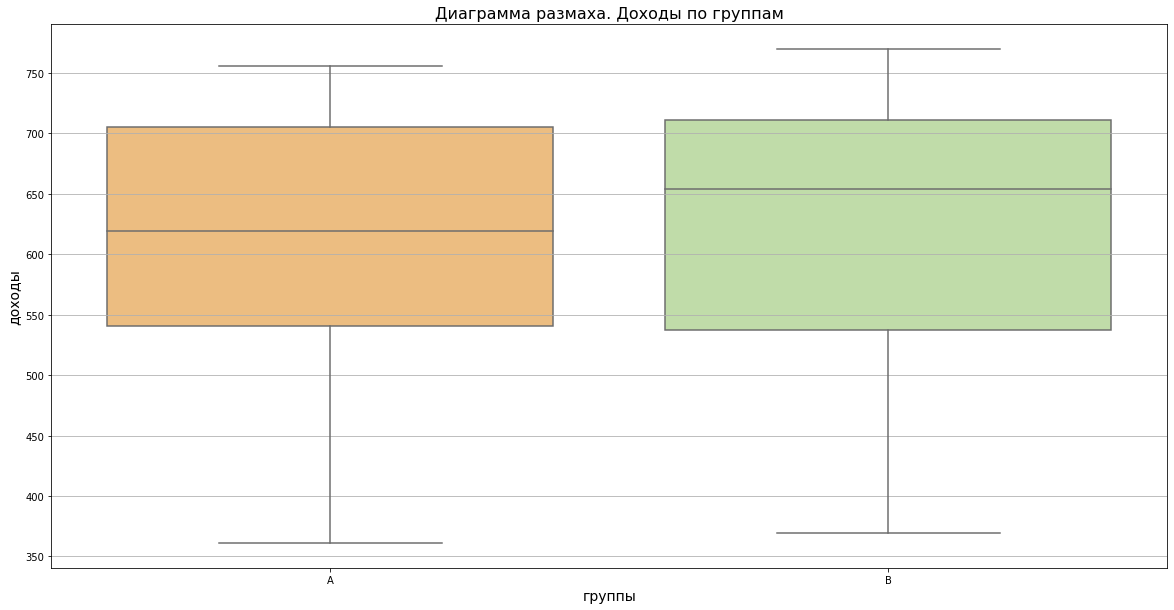

In [20]:

display(visitors['visitors'].describe())
plt.figure(figsize=(20,10))

plt.grid(axis='y', alpha=1)

sns.boxplot(x='group', y='visitors', data=visitors, palette='Spectral')
plt.title('Диаграмма размаха. Доходы по группам', fontsize=16)
plt.xlabel('группы', fontsize=14)
plt.ylabel('доходы', fontsize=14)
plt.show()

Обобщение по результатам знакомства:

    - аномалий не выявлено
    - пропусков не выявлено
    - значения в части определения параметров таблиц корректны (2 группы)
    - в таблице с гипотезами используется диапазон значений от 1 до 10, ошибок (меньше 0 или больше 10) нет
    - временной интервал идентичный - с 1 по 31 августа 2019 года
    - есть выбросы в суммах заказа в группе В, а в процентном соотношении в группе В на 18.24% общая сумма покупок больше, чем в группе А
    - размер выборок групп по количестве покупателей/посетителей примерно равны, но не идентичны, разница 0.48% - принимаем за некритичную разницу.
    - 58 клиентов попали сразу в обе группы, некоторые клиенты были очень активными и совершили более 10 заказов за месяц, но для анализа данные попадания в обе группы не критичны.

# Этап 1.

## Приоритизация гипотез

### Используем фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [21]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


ice score = (Impact*Confidence)/Efforts

In [22]:
hypothesis ['ICE'] = (hypothesis['Impact']*hypothesis ['Confidence'])/hypothesis ['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2) 
display (hypothesis [['Hypothesis', 'ICE']].sort_values (by='ICE', ascending = False).head (10))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По результатам расчетам скоринга веса гипотез, выделяются три лидера - гипотезы под номерами:

    - №8 - Запустить акцию, дающую скидку на товар в день рождения
    - №0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    - №7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Используем фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [23]:
hypothesis ['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis ['Confidence'])/hypothesis ['Efforts']
hypothesis['RICE'] = hypothesis['RICE'].round(2) 
display (hypothesis [['Hypothesis', 'RICE']].sort_values (by='RICE', ascending = False).head (10))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод** 

По результатам расчета скорингового балла RICE лидеры немного скорректированы, теперь это:
    
    - № 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    - № 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
    - № 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
    
    
Гипотеза № 8 (Запустить акцию, дающую скидку на товар в день рождения) потеряла позиции, так как имеет небольшой охват, и касается только именинников среди клиентов, а новообретенные "лидеры" коснутся всех клиентов, что соответствует значению Reach  в гипотезе № 8=1, а гипотеза № 2, несмотря на низкое значение влияния (всего 3), имеет высокий охват и низкий уровень сложности реализации, что с высокой долей вероятности позволит ее проверить значительно быстрее.  
Учитывая результаты расчета скорингового балла, рекомендации по тестированию будут отражать необходимость отработки 7 гипотезы, и возможно 2-ой


# Этап 2

## График кумулятивной выручки по группам. 

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [24]:
datesGroups = orders[['date','group']].drop_duplicates() 


In [25]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])].\
                                     agg({'date' : 'max',
                                          'group' : 'max',
                                          'transactionId' : 'nunique',
                                          'visitorId' : 'nunique',
                                          'revenue' : 'sum'}),
                                     axis=1).sort_values(by=['date','group'])


In [26]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                      visitors['group'] == x['group'])].\
    agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),\
    axis=1).sort_values(by=['date','group']
)


In [27]:
# объеденим кумулятивные данные в одной таблице и присвоим ее столбцам новые названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

### датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

### датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [29]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101
11,2019-08-06,824337,129
13,2019-08-07,1049671,153
15,2019-08-08,1270589,180
17,2019-08-09,1431401,205
19,2019-08-10,1539203,228


### Строим графики 2-х выборок 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


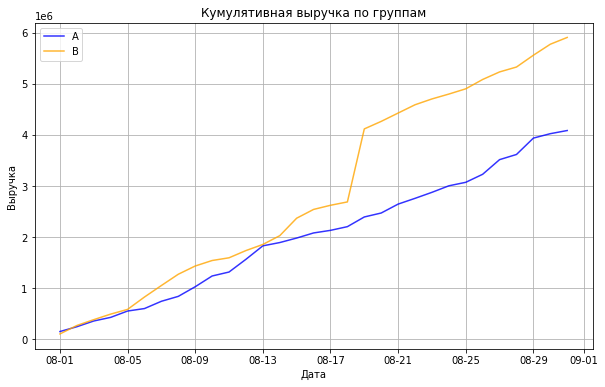

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='blue', alpha=0.8)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='orange', alpha=0.8)
plt.grid(True)
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
date_form = DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.legend(loc='upper left')
plt.show()

**Вывод**

Как видно из графика, примерно до 5-го августа кумулятивная выручка примерно одинаково растет, как в группе А, так и в группе В. Однако, начиная с 13 августа, группа В показывает куда более существенный рост. В районе 18-19 авугста наблюдается резкий скачок в группе В, с последующим равномерным ростом. Группа А, также увеличивается со временнем (все таки расчет идет кумулятивной выручки), но заметно меньшими темпами, чем группа В.

Стоит сразу разобраться, что произошло в группе В в период 18-19 августа

In [31]:
# сделаем срез данных нашей сгруппированной таблицы по периоду 18-19 августа
cumulativeRevenueB_18_19 = cumulativeRevenueB.query('date >= "2019-08-18" and date <= "2019-08-19"')
diff = (cumulativeRevenueB_18_19.loc[37, 'revenue'] - cumulativeRevenueB_18_19.loc[35, 'revenue']) / \
cumulativeRevenueB_18_19.loc[35, 'revenue'] * 100

display (cumulativeRevenueB_18_19)
display (diff)

,date,revenue,orders
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403


53.22373345551903

в кумулятивной выруче скачок на 53%, выброс, аномально крупный заказ/заказы? посмотрим внимательнее на 19 августа

In [32]:
orders_19_В = orders.query ('date=="2019-08-19" and group=="B"')
display (orders_19_В.sort_values (by = 'revenue', ascending=False))
display (orders_19_В[orders_19_В['revenue'] != 1294500]['revenue'].mean())

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B
423,4161654914,990904712,2019-08-19,11249,B
523,1739748874,522292794,2019-08-19,4880,B
367,1033377712,3860669668,2019-08-19,3990,B
529,90109939,2075769885,2019-08-19,3525,B
426,19467429,2397843657,2019-08-19,2630,B


6771.0

Вы видим очень большой заказ на сумму 1 294 500, хотя за весь период среднее значение составило 8348,  за 19 августа меньше - 6771. Пока расчеты и корректировки делать не будем, так как у нас впереди будет обособленный анализ "очищенных" данных, но мы уже понимаем, что в группе В есть аномально крупные заказы.

## График кумулятивного среднего чека по группам. 

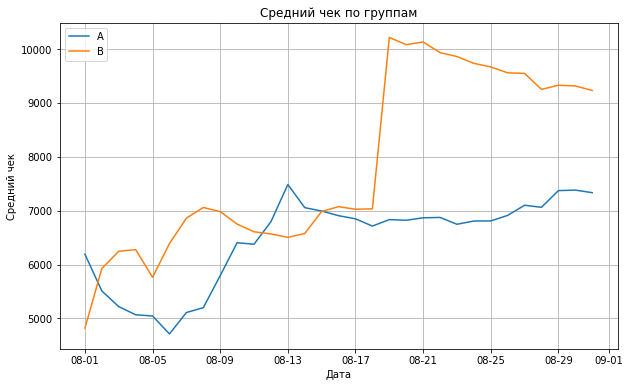

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid(True)
plt.title("Средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
date_form = DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.legend(loc='upper left')
plt.show()

На графике мы опять наблюдаем за скачком среднего чека в отмеченный ранее день - 19 августа, но даже без "аномалии", группа В показывает больший рост начиная с 15 августа. Стоит отметить, что ранее на общей сумме выручки мы отмечали, что после 13-го августа группа В показывала стабильно более высокий рост выручки, но на среднем чеке мы видим, что 13-го августа контрольная группа вырывалась вперед, данные всплески мы оценим в следующих этапах анализа.

В части скачка группы В, однозначного выхода на плато мы не наблюдаем, наоборот есть некоторое падение среднего чека после скачка, что логично, если принять за допущение, что скачок произошел по причине аномально крупного заказа, и "истинный" средний чек может себя показать, или после чистки данных, или после большего периода наблюдений.  


## График относительного изменения кумулятивного среднего чека группы B к группе A

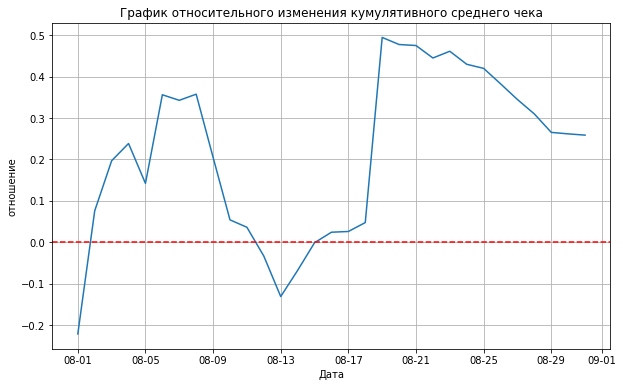

In [34]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.grid(True)
plt.title("График относительного изменения кумулятивного среднего чека")
plt.xlabel("Дата")
plt.ylabel("отношение")
date_form = DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)

plt.show()

Группа В, после 15 августа показывает стабильно большее значение, всплеск 19 августа виден и тут конечно, но пока общая тенденция просматривается- показатели группы В значительно лучше.

## График кумулятивного среднего количества заказов на посетителя по группам. 

In [35]:
cumulativeData['convers'] = ((cumulativeData['orders']/cumulativeData['visitors'])*100).round (4)

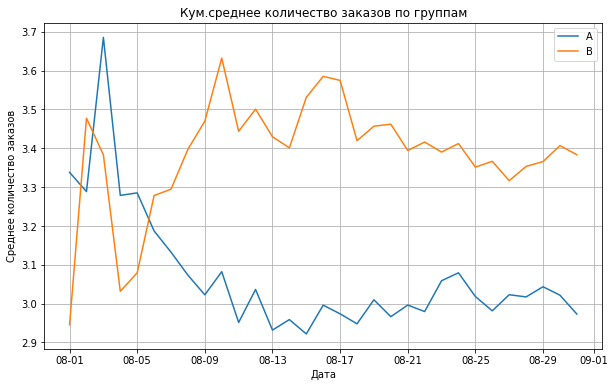

In [36]:
plt.figure(figsize=(10, 6))
cumulativeDataA = cumulativeData [cumulativeData['group']=='A']
cumulativeDataB = cumulativeData [cumulativeData['group']=='B']
plt.plot (cumulativeDataA ['date'], cumulativeDataA ['convers'], label='A')
plt.plot (cumulativeDataB ['date'], cumulativeDataB ['convers'], label='B')
plt.grid(True)
plt.title("Кум.среднее количество заказов по группам")
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов")
date_form = DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.legend(loc='upper right')
plt.show()


Если в общем и целом, обе группы показывают сопостовимые показатели среднего количества заказов на посетителя, в диапазоне от 3,0 до 3,7, да, значение и в группе А и в группе В, меньше 4, но если опираться на конкретные цифры, показатель среднего количества заказов в группе В лучше, в период с 1 по 5 августа обе группы показывают всплеск, причем группа А показывает всплеск почти до 3.7, но уже после 6 августа группы меняются местами, и группа В имеет стабильный рост количества заказов на посетителя с выходом на потенциальное плато в районе 3,3-3,4, а группа А наоборот проседает и закрепляется около 3,0

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

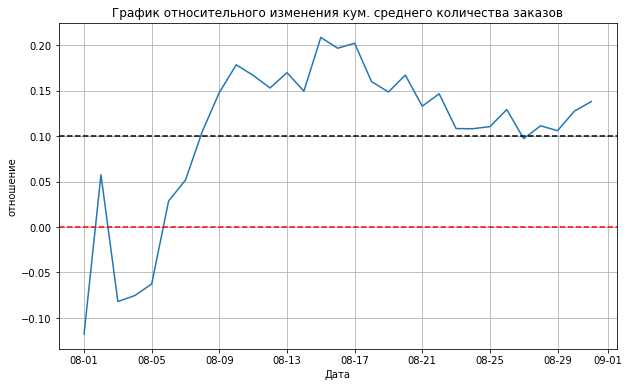

In [37]:
mergedCumulativeconvers = cumulativeDataA.merge(cumulativeDataB, left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeconvers['date'],
         (mergedCumulativeconvers['ordersB']/mergedCumulativeconvers['visitorsB'])/\
         (mergedCumulativeconvers['ordersA']/mergedCumulativeconvers['visitorsA'])-1)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.grid(True)
plt.title("График относительного изменения кум. среднего количества заказов")
plt.xlabel("Дата")
plt.ylabel("отношение")
date_form = DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)

plt.show()

Как и отмечалось на прошлом этапе, начиная с 6 августа кум.сред.количество заказов группы В значительно лучше контрольной, после указанной даты, отношение переходит границу 0, и далее к концу наблюдаемого периода закрепляется в диапазоне 0,10-0,15, без тенденции на снижение. 

## Точечный график количества заказов по пользователям

In [38]:
ordersByUsers = orders.groupby ('visitorId', as_index=False).agg ({'transactionId':'nunique'})
ordersByUsers.columns = ['userId', 'orders']
display (ordersByUsers.sort_values (by ='orders', ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


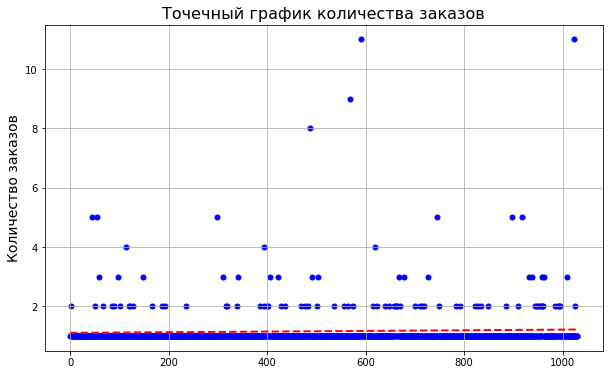

In [39]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders'], marker='o', s=25, color='blue')
plt.grid(True)
plt.title("Точечный график количества заказов", fontsize=16)

plt.ylabel("Количество заказов", fontsize=14)

z = np.polyfit(x_values, ordersByUsers['orders'], 1)
p = np.poly1d(z)
plt.plot(x_values,p(x_values),"r--", linewidth=2)



plt.rcParams.update({'font.size': 14})
plt.show()

Подавляющее большинство клиентов делает только 1 заказ(линия тренда на графике), стоит отметить, что имеется слабый тренд на смещение среднего количества заказов в сторону 2-х (очень малый). Часть клиентов делает более 1-го заказа, но после значения 2 - такие заказы единичны. Имеются и аномально активные клиенты с 8 и более заказов на клиента

## 95-й и 99-й перцентили количества заказов на пользователя.

In [40]:
percentiles = np.percentile(ordersByUsers['orders'], [95,96,97,98,99])
display('Процентили количества заказов на одного кользователя 95,96,97,98,99:', percentiles)

percentiles_98 = np.percentile(ordersByUsers['orders'], [98])
display('Процентили количества заказов на одного кользователя - 98%:', percentiles_98)

'Процентили количества заказов на одного кользователя 95,96,97,98,99:'

array([2., 2., 2., 3., 4.])

'Процентили количества заказов на одного кользователя - 98%:'

array([3.])

95% пользователей вошли в 2 заказа, 99% включают пользователей с заказами до 4-х, но мы видим, что для 98% граница в районе 3-х заказов на пользователя. Оставляет для расчетов 98%

## Точечный график стоимостей заказов.

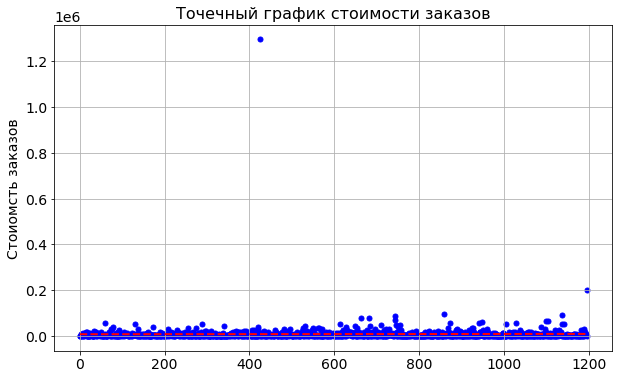

In [41]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'], marker='o', s=25, color='blue')
plt.grid(True)
plt.title("Точечный график стоимости заказов", fontsize=16)

plt.ylabel("Стоиомсть заказов", fontsize=14)

z = np.polyfit(x_values, orders['revenue'], 1)
p = np.poly1d(z)
plt.plot(x_values,p(x_values),"r--", linewidth=2)



plt.rcParams.update({'font.size': 14})
plt.show()

Как уже отмечалось ранее подавляющее большинство заказов находится в пределах 0,1 (читать 100 000), а общая тенденция в стоимости заказов еще ниже - около 0,01 (читать 10 000), имеются аномально большие заказы, которые ранее мы уже отмечали на прошлых этапах анализа, в частности был отмечен заказ на сумму около 1 250 000.  Посмотрим на этот же параметр без отмеченных на графике аномалий

In [42]:
orders_drop_anomaly = orders.query ('revenue <= 150000')

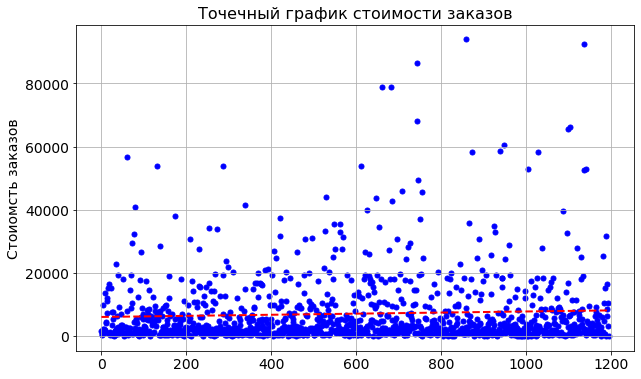

In [43]:
x_values = pd.Series(range(0, len(orders_drop_anomaly)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_drop_anomaly['revenue'], marker='o', s=25, color='blue')
plt.grid(True)
plt.title("Точечный график стоимости заказов", fontsize=16)

plt.ylabel("Стоиомсть заказов", fontsize=14)

z = np.polyfit(x_values, orders_drop_anomaly['revenue'], 1)
p = np.poly1d(z)
plt.plot(x_values,p(x_values),"r--", linewidth=2)



plt.rcParams.update({'font.size': 14})
plt.show()

Теперь график стал более наглядный, мы видим, что ранее осуществленные расчеты, согласно которым средняя стоимость заказов около 8 000 рублей, нашел свое подтверждение в графике (линия тенденции)

## 95-й и 99-й перцентили стоимости заказов

In [44]:
percentiles = np.percentile(orders['revenue'], [95,96,97,98,99])
display('Процентили количества заказов на одного кользователя 95,96,97,98,99:', percentiles)
percentiles_99 = np.percentile(orders['revenue'], [99])
display('Процентили количества заказов на одного кользователя 95,96,97,98,99:', percentiles_99)

'Процентили количества заказов на одного кользователя 95,96,97,98,99:'

array([28000. , 31382. , 35485. , 44133.2, 58233.2])

'Процентили количества заказов на одного кользователя 95,96,97,98,99:'

array([58233.2])

В диапазон до 95% вошли заказы с стоимостью до 28000, 98 процентов заказов в диапазоне до 58322. Учитывая результаты анализа графика и определения процентелей, останавливаемся на 99%

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

**Вводные**

В расчетах используется непараметрический тест Уилкоксона-Манна-Уитни, с оценкой при уровне значимости 0,05

Мы уже отмечали на прошлых этапах, что наблюдаем выбросы, но для определений их значимости необходимо провести дополнительное исследование.

Для начала, сформулируем гипотезы. **Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.**



In [45]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


In [46]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [47]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders'] 

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB

In [48]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [49]:
print  ('alpha =',0.05)
display ("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

display ("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05


'0.017'

'0.138'

**Вывод**

По "сырым" данным наблюдается статистическая значимая разница, так как p-value меньше 0,05. Относительный выигрыш группы В к группе А около 13,8%.

нулевую гипотезу отвергаем, статистическая значимость различий по "сырым" данным есть.


## Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке между группами есть.**

In [50]:
print  ('alpha =',0.05)
display ('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                             orders[orders['group']=='B']['revenue'])[1]))
display ('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


alpha = 0.05


'0.729'

'0.259'

Результат теста - p-value больше 0,05 - нулевую гипотезу не отвергаем. 

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Нулевая гипотеза: различий в конверсии между группами нет. Альтернативная гипотеза: различия в конверсии между группами есть.**

Ранее мы отпределили границы аномалий в части количества и суммы заказов в 3 и 58234 соответсвенно

In [51]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= percentiles_98[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= percentiles_98[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentiles_99[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display (abnormalUsers.head(5))
display (abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

31

всего 31 аномальный пользователь

Оценим различия по "очищенным данным"

In [52]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print  ('alpha =',0.05)
display ('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display ('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05


'0.010'

'0.174'

Результаты по среднему количеству заказов изменились. Нулевую гипотезу отвергаем, выгрыш группы В после очистки данных, по сравнению с группой А около 17,4%

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [53]:
print  ('alpha =',0.05)
display (
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display (
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


alpha = 0.05


'0.798'

'-0.020'

Результат: Нулевую гипотезу не отвергаем, значение p-value больше 0,05, проигрыш группы В, после очистки данных, в среднем чеке составляет около 2%

# Выводы и рекомендации

По итогам изучения результатов теста, получены следующие данные:

1.	На «сырых» данных:

    a.	Отказ от основной гипотезы в пользу альтернативной гипотезы – имеются статистически значимые различия в среднем количестве заказов между группами, выигрыш группы В составляет 13,8% 
    b.	Основную гипотезу не отвергаем – статистически значимых различий в среднем чеке нет, хоть выигрыш группы В по среднему чеку составляет 25,9%, но в ходе исследования пришли к пониманию, что данные значения получены благодаря случайному выбросу в виде аномально большого заказа.
    
2.	На «очищенных» данных:

    a.	Отказ от основной гипотезы в пользу альтернативной гипотезы – имеются статистически значимые различия в среднем количестве заказов между группами, выигрыш группы В составляет 17,4% 
    
    b.	Основную гипотезу не отвергаем – статистически значимых различий в среднем чеке нет.

    Как можем увидеть, после очистки от аномальных значений, оценка гипотез не изменилась, а вот результаты отношений претерпели существенные изменения.
    
    Так, после очистки уровень конверсии в группе В стал 17,4% против 13,8% до.
    
    Средний чек, после очистки сильно стал меньше в группе В, до очистки разница была 25,9%, а после очистки -2%. Данный момент предполагался на всем этапе работы с данными, так как были выявлены аномально большие заказы, в частности заказ на сумму более 1,294 млн., против среднего чека около 8 348. 

**Итог:** Проведение теста рекомендуется остановить, по результатам тестирования - группа В показала себя значительно более эффективной, с выигрышем в 17,4% в части среднего количества заказов на посетителя. Таким образом, на каждого посетителя из группы В приходится на 17.4% больше заказов чем на каждого посетителя из группы А, что в свою очередь может увеличить общую выручку относительно посетителей из группы В.